In [51]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib.patches as patches
import numpy as np
from astropy import units as u
from astropy.units import imperial
imperial.enable()
from astropy.io.misc import yaml

## Color maps

Below the color map used for plotting. Color numbers are selected from the list below.

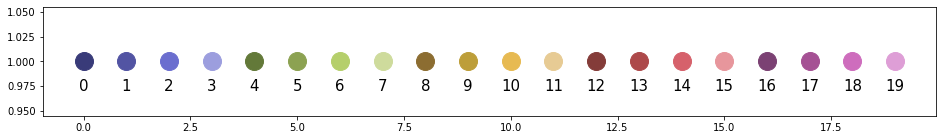

In [64]:
def get_color(color_id,
             ncolors=20):
    "get RGB color tuble"

    colormap = plt.cm.tab20b
    colors = [colormap(i) for i in np.linspace(0, 1, ncolors + 1)]
    
    return colors[color_id]

plt.figure(figsize=(16,2))

ncolor=20
for z in range(ncolor):
    plt.plot(z, 1., 'o',
            markerfacecolor=get_color(z, ncolor),
            markeredgecolor=get_color(z, ncolor),
            markersize=18)
    plt.text(z, 0.97, 
             str(z),
            fontsize=15,
            horizontalalignment='center')

## Axis labels

Definition of axis ticks and alphanumberical labels

In [65]:
# x-axis labels
x_dist=[]
x_label=[]

x_dist.append(1.e3)
x_label.append('km')

x_dist.append(1.e6)
x_label.append('$10^{3}$ km')



x_dist.append( (1*u.AU).to(u.m).value)
x_label.append('AE')

x_dist.append( (1*u.pc).to(u.m).value)
x_label.append('pc')

x_dist.append( (1*u.kpc).to(u.m).value)
x_label.append('kpc')

x_dist.append( (1*u.Mpc).to(u.m).value)
x_label.append('Mpc')

# y-axis labels
y_b = []
y_label = []

y_b.append( 1.e-9 )
y_label.append( "nG")

y_b.append( 1.e-6 )
y_label.append( "muG")

y_b.append( 1.e-3 )
y_label.append( "mG")

y_b.append( 1. )
y_label.append( "G")

y_b.append( 1.e3 )
y_label.append( "kG")

y_b.append( 1.e6 )
y_label.append( "MG")

y_b.append( 1.e9 )
y_label.append( "GG")

In [127]:
def plotMaxAcceleration( Z, 
                        beta, 
                        markercolor="b",
                        lstyle="-"):
    """plot maximum acceleration"""
    
    r = np.linspace(500., 5.e24, 250)
    B = 1.e-6*2. * 1.e5 / ((r * u.m).to(u.pc).value)/Z/beta
    
    plt.plot(r, 
             B,
            color=markercolor,
            linestyle=lstyle,
            zorder=0)

In [128]:
def getValue(v, to_unit):
    return v['value']*u.Unit(v['unit']).to(to_unit)

def plotHillasObjects(data, ax):
    """
    plot Hillas objects
    - Markers
    - Circles
    - Boxes
    """
    
    # marker p
    for o, v in data.items():
        # plot label
        plt.text(getValue(v['label_pos_size'], u.m),
             getValue(v['label_pos_magn'], u.G),
             v['label_de'],
             fontsize=25,
             color=get_color(v['color']))
        
        # plot object
        if v['type'] == 'Marker':
            r = getValue(v['size'], u.m)
            B = getValue(v['magn'], u.G)
            plt.plot(r, 
                     B, 
                     'o',
                     markerfacecolor=get_color(v['color']),
                     markeredgecolor=get_color(v['color']),
                     markersize=18)
            print("Plotting Marker", 
                  v['label_de'], get_color(v['color']))
            
        elif v['type'] == 'Rectangle':
            r_min = getValue(v['size_min'], u.m)
            r_max = getValue(v['size_max'], u.m)
            B_min = getValue(v['magn_min'], u.G)
            B_max = getValue(v['magn_max'], u.G)
            ax.add_patch( Rectangle((r_min,
                           B_min),
                          r_max-r_min,
                          B_max-B_min,
                          facecolor=get_color(v['color'])))
            print("Plotting Rectangle", v['label_de'])
            
        elif v['type'] == 'Trapezoid':
            r=[]
            B=[]
            r.append(getValue(v['size_1'], u.m))
            r.append(getValue(v['size_2'], u.m))
            r.append(getValue(v['size_3'], u.m))
            r.append(getValue(v['size_4'], u.m))
            B.append(getValue(v['magn_1'], u.G))
            B.append(getValue(v['magn_2'], u.G))
            B.append(getValue(v['magn_3'], u.G))
            B.append(getValue(v['magn_4'], u.G))
            ax.add_patch(patches.Polygon(
                xy=list(zip(r,B)),
                facecolor=get_color(v['color'])))
 
            print("Plotting Polygon", v['label_de'], v['color'],get_color(v['color']) )
    


In [133]:
with open('HillasObjects.yaml') as f:
    data = yaml.load(f)

Plotting Marker LHC (0.5176470588235295, 0.23529411764705882, 0.2235294117647059, 1.0)
Plotting Rectangle Weisse
Zwerge
Plotting Polygon Neutronensterne 9 (0.7411764705882353, 0.6196078431372549, 0.2235294117647059, 1.0)
Plotting Rectangle Wolf Rayet
Sterne
Plotting Polygon Super-
novae 8 (0.5490196078431373, 0.42745098039215684, 0.19215686274509805, 1.0)
Plotting Polygon Normale
Galaxien 6 (0.7098039215686275, 0.8117647058823529, 0.4196078431372549, 1.0)
Plotting Rectangle Galaxien-
haufen
Plotting Rectangle Starburst Winde
Plotting Polygon AGN Hotspots 0 (0.2235294117647059, 0.23137254901960785, 0.4745098039215686, 1.0)
Plotting Polygon AGN Knots 1 (0.3215686274509804, 0.32941176470588235, 0.6392156862745098, 1.0)
Plotting Polygon AGN Lobes 2 (0.4196078431372549, 0.43137254901960786, 0.8117647058823529, 1.0)
Plotting Polygon GRBs 17 (0.6470588235294118, 0.3176470588235294, 0.5803921568627451, 1.0)
Plotting Polygon LL GRBs
 TDE 19 (0.8705882352941177, 0.6196078431372549, 0.83921568627

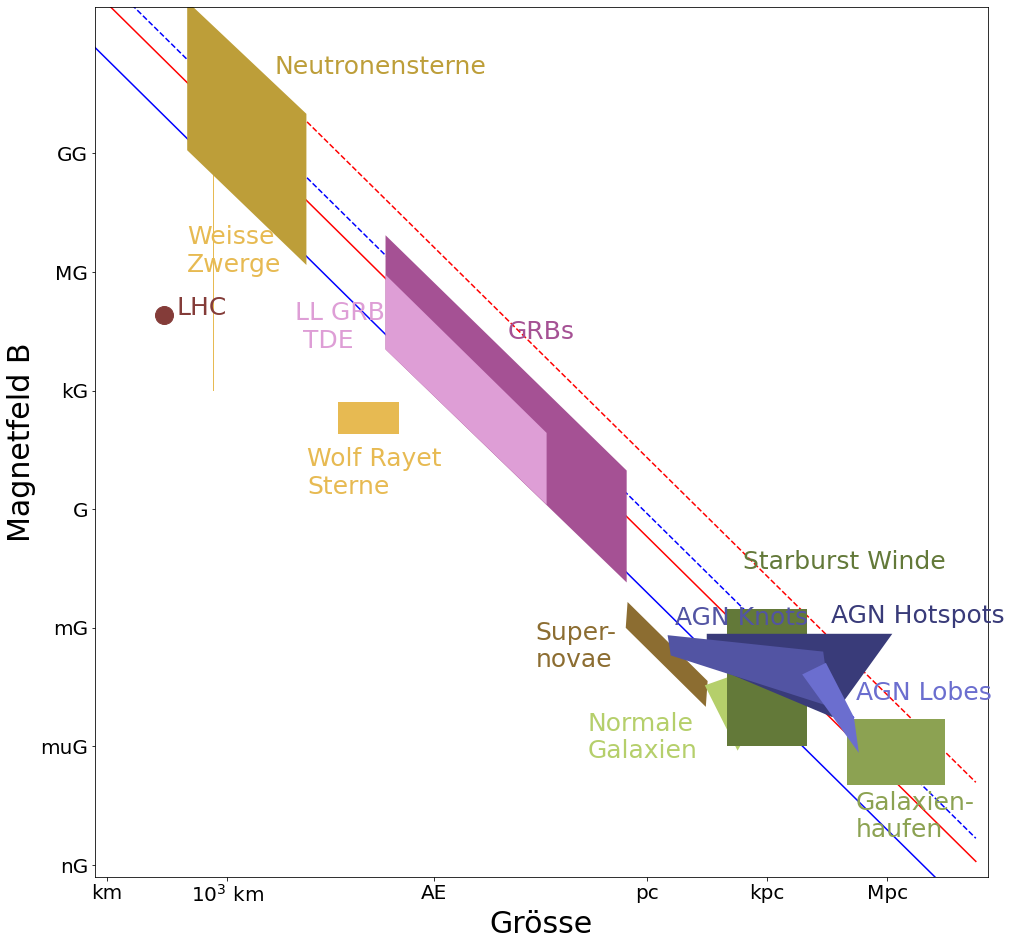

In [134]:
plt.figure(figsize=(16,16))
ax=plt.gca()

plt.xlim( 500., 1.e25)
plt.xscale('log')
plt.xticks(x_dist, 
           x_label, 
           fontsize=20)
plt.xlabel('Grösse',
          fontsize=30)

plt.ylim(0.5e-9, 5.e12)
plt.yscale('log')
plt.yticks(y_b, 
           y_label,
          fontsize=20)

plt.ylabel('Magnetfeld B',
          fontsize=30)

plotMaxAcceleration( 1, 1, "r")
plotMaxAcceleration( 1, 0.01, "r", "--")
plotMaxAcceleration( 26, 1, "b")
plotMaxAcceleration( 26, 0.01, "b", "--")


plotHillasObjects(data, ax)

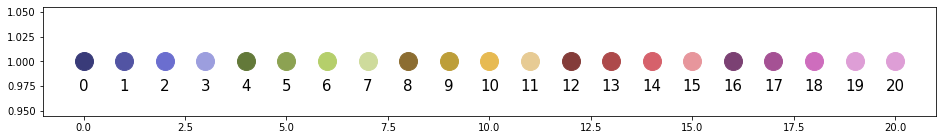

In [124]:
colormap = plt.cm.tab20b
ncolors=20
colors = [colormap(i) for i in np.linspace(0, 1, ncolors + 1)]
plt.figure(figsize=(16,2))
z=0
for c in colors:
    plt.plot(z, 1., 'o',
            markerfacecolor=c,
            markeredgecolor=c,
            markersize=18)
    plt.text(z, 0.97, 
             str(z),
            fontsize=15,
            horizontalalignment='center')
    z=z+1